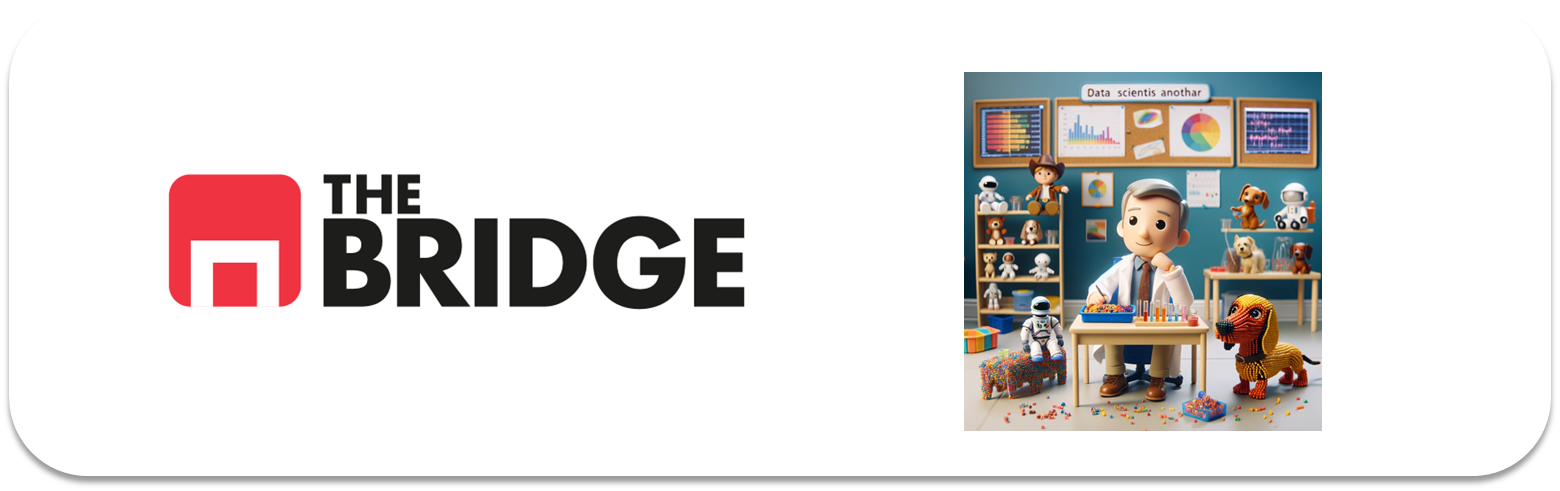

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np

In [76]:
import matplotlib.pyplot as plt
import scipy

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [77]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [78]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [79]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [81]:
df_titanic["age"].value_counts(dropna = False)


age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [82]:
age_nulos = round((df_titanic["age"].isnull().sum())/len(df_titanic)*100,2)
age_nulos

19.87

In [83]:
#df_titanic.loc[df_titanic["age"].isna(), "age"] = df_titanic["age"].mean()
# Esto funciona, pero es un poco a lo bestia

#age_media_hombre = df_titanic.loc[df_titanic["who"] == "man", "age"].mean()
#age_media_mujer = df_titanic.loc[df_titanic["who"] == "woman", "age"].mean()
#age_media_menor = df_titanic.loc[df_titanic["who"] == "child", "age"].mean()

#df_titanic["age"] = np.where((df_titanic["age"].isna()) & (df_titanic["who"] == "child"), age_media_menor, df_titanic["age"])
#df_titanic["age"] = np.where((df_titanic["age"].isna()) & (df_titanic["who"] == "man"), age_media_hombre, df_titanic["age"])
#df_titanic["age"] = np.where((df_titanic["age"].isna()) & (df_titanic["who"] == "woman"), age_media_mujer, df_titanic["age"])

# Esto tb funciona, pero da un pico terrible sobre los 30 (la mediana peor, sobre los 20 y pico)
# En lugar de eso, probaré de eliminar los registros nulos de edad a ver si el resultado tiene más sentido

In [84]:
df_titanic["embarked"].value_counts(dropna = False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [85]:
embarked_nulos = round((df_titanic["embarked"].isnull().sum())/len(df_titanic)*100,2)
embarked_nulos

0.22

In [86]:
df_titanic["embark_town"].value_counts(dropna = False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [87]:
emb_town_nulos = round((df_titanic["embark_town"].isnull().sum())/len(df_titanic)*100,2)
emb_town_nulos

0.22

In [88]:
df_titanic["deck"].value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [89]:
deck_nulos = round((df_titanic["deck"].isnull().sum())/len(df_titanic)*100,2)
deck_nulos

77.22

In [90]:
df_titanic2 = df_titanic.copy() # dejo la 2 de resguardo
df_titanic.drop(columns = ["parch","deck","pclass","sex"], inplace = True)
# deck tiene demasiados NaN, pclass repite class y sex repite who
df_titanic

,survived,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [91]:
df_titanic.dropna(axis = "index", inplace = True)

In [92]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   age          712 non-null    float64 
 2   sibsp        712 non-null    int64   
 3   fare         712 non-null    float64 
 4   embarked     712 non-null    object  
 5   class        712 non-null    category
 6   who          712 non-null    object  
 7   adult_male   712 non-null    bool    
 8   embark_town  712 non-null    object  
 9   alive        712 non-null    object  
 10  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(2), object(4)
memory usage: 52.3+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived       | Si sobrevivió o no |
| class       | Clase |
| sex       | Sexo |
| age       | Edad |
| sibsp       | Cantidad de familiares |
| fare       | Tarifa |
| embarked       | Dónde embarcó |
| adult_male       | Si es hombre adulto |
| embark_town       | En qué ciudad embarcar |
| alive       | Si sigue vivo |
| alone       | Si viajaba solo |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

Queenstown, Southampton, Cherbourg

In [93]:
# df_titanic["embarked"] = np.where(df_titanic["embarked"] == "S", df_titanic["embarked"], "Southampton")
# df_titanic["embarked"] = np.where(df_titanic["embarked"] == "Q", df_titanic["embarked"], "Queenstown")
# df_titanic["embarked"] = np.where(df_titanic["embarked"] == "C", df_titanic["embarked"], "Cherbourg")
# df_titanic

ciudades = {
    "Q": "Queenstown", 
    "C": "Cherbourg", 
    "S": "Southampton"
}

df_titanic["embarked"] = df_titanic["embarked"].replace(ciudades)
df_titanic

,survived,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,22.0,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,38.0,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,26.0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,35.0,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,35.0,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,29.1250,Queenstown,Third,woman,False,Queenstown,no,False
886,0,27.0,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,19.0,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
889,1,26.0,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True


In [94]:
df_titanic.drop(columns = ["embark_town"], inplace = True) # es lo mismo que embarked
df_titanic

,survived,age,sibsp,fare,embarked,class,who,adult_male,alive,alone
0,0,22.0,1,7.2500,Southampton,Third,man,True,no,False
1,1,38.0,1,71.2833,Cherbourg,First,woman,False,yes,False
2,1,26.0,0,7.9250,Southampton,Third,woman,False,yes,True
3,1,35.0,1,53.1000,Southampton,First,woman,False,yes,False
4,0,35.0,0,8.0500,Southampton,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,29.1250,Queenstown,Third,woman,False,no,False
886,0,27.0,0,13.0000,Southampton,Second,man,True,no,True
887,1,19.0,0,30.0000,Southampton,First,woman,False,yes,True
889,1,26.0,0,30.0000,Cherbourg,First,man,True,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

Las categóricas son, en esta prioridad:
- survived, class, who, alone, embarked
Las numericas son, en esta prioridad:
- age, fare

In [95]:
# Función del gráfico de barras
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [96]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [97]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [98]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [99]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [100]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

### #2.1 Categóricas

In [101]:
# Para empezar a analizar las categóricas hago un describe
df_titanic["survived"].describe() 

count    712.000000
mean       0.404494
std        0.491139
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [102]:
df_titanic["class"].describe()

count       712
unique        3
top       Third
freq        355
Name: class, dtype: object

In [103]:
 df_titanic["who"].describe()

count     712
unique      3
top       man
freq      413
Name: who, dtype: object

In [104]:
df_titanic["alone"].describe()

count      712
unique       2
top       True
freq       402
Name: alone, dtype: object

In [105]:
df_titanic["embarked"].describe()

count             712
unique              3
top       Southampton
freq              554
Name: embarked, dtype: object

In [106]:
# Ahora me he puesto a discriinar las edades y demás solo de los sobrevivientes
moda_clase_sobrevivientes = df_titanic[df_titanic['survived'] == 1]['class'].mode()[0]
print(f"La mayoría de los sobrevivientes era de: {moda_clase_sobrevivientes}")

La mayoría de los sobrevivientes era de: First


In [107]:
moda_who_sobrevivientes = df_titanic[df_titanic['survived'] == 1]['who'].mode()[0]
print(f"La mayoría de los sobrevivientes era: {moda_who_sobrevivientes}")

La mayoría de los sobrevivientes era: woman


In [108]:
moda_alone_sobrevivientes = df_titanic[df_titanic['survived'] == 1]['alone'].mode()[0]
solo = "solo" if moda_alone_sobrevivientes else "acompañado"

print(f"La mayoría de los sobrevivientes iba {solo}.")

La mayoría de los sobrevivientes iba acompañado.


In [109]:
moda_embarque_sobrevivientes = df_titanic[df_titanic['survived'] == 1]["embarked"].mode()[0]
print(f"La mayoría de los sobrevivientes subió en: {moda_embarque_sobrevivientes}")

La mayoría de los sobrevivientes subió en: Southampton


In [110]:
media_edad_sobrevivientes = df_titanic[df_titanic['survived'] == 1]["age"].mean()
print(f"La mayoría de los sobrevivientes tenía: {round(media_edad_sobrevivientes)} años")

La mayoría de los sobrevivientes tenía: 28 años


In [111]:
# Ahora,  pido la moda
df_titanic["survived"].mode()

0    0
Name: survived, dtype: int64

In [112]:
df_titanic["class"].mode()

0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [113]:
df_titanic["who"].mode()

0    man
Name: who, dtype: object

In [114]:
df_titanic["alone"].mode()

0    True
Name: alone, dtype: bool

In [115]:
df_titanic["embarked"].mode()

0    Southampton
Name: embarked, dtype: object

In [116]:
# Ahora la frecuencia absoluta de las categóricas 
var_categ_titanic = ["survived", "class","who","alone","embarked"]
for catego in var_categ_titanic:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n")

Para survived
survived
0    424
1    288
Name: count, dtype: int64


Para class
class
Third     355
First     184
Second    173
Name: count, dtype: int64


Para who
who
man      413
woman    216
child     83
Name: count, dtype: int64


Para alone
alone
True     402
False    310
Name: count, dtype: int64


Para embarked
embarked
Southampton    554
Cherbourg      130
Queenstown      28
Name: count, dtype: int64




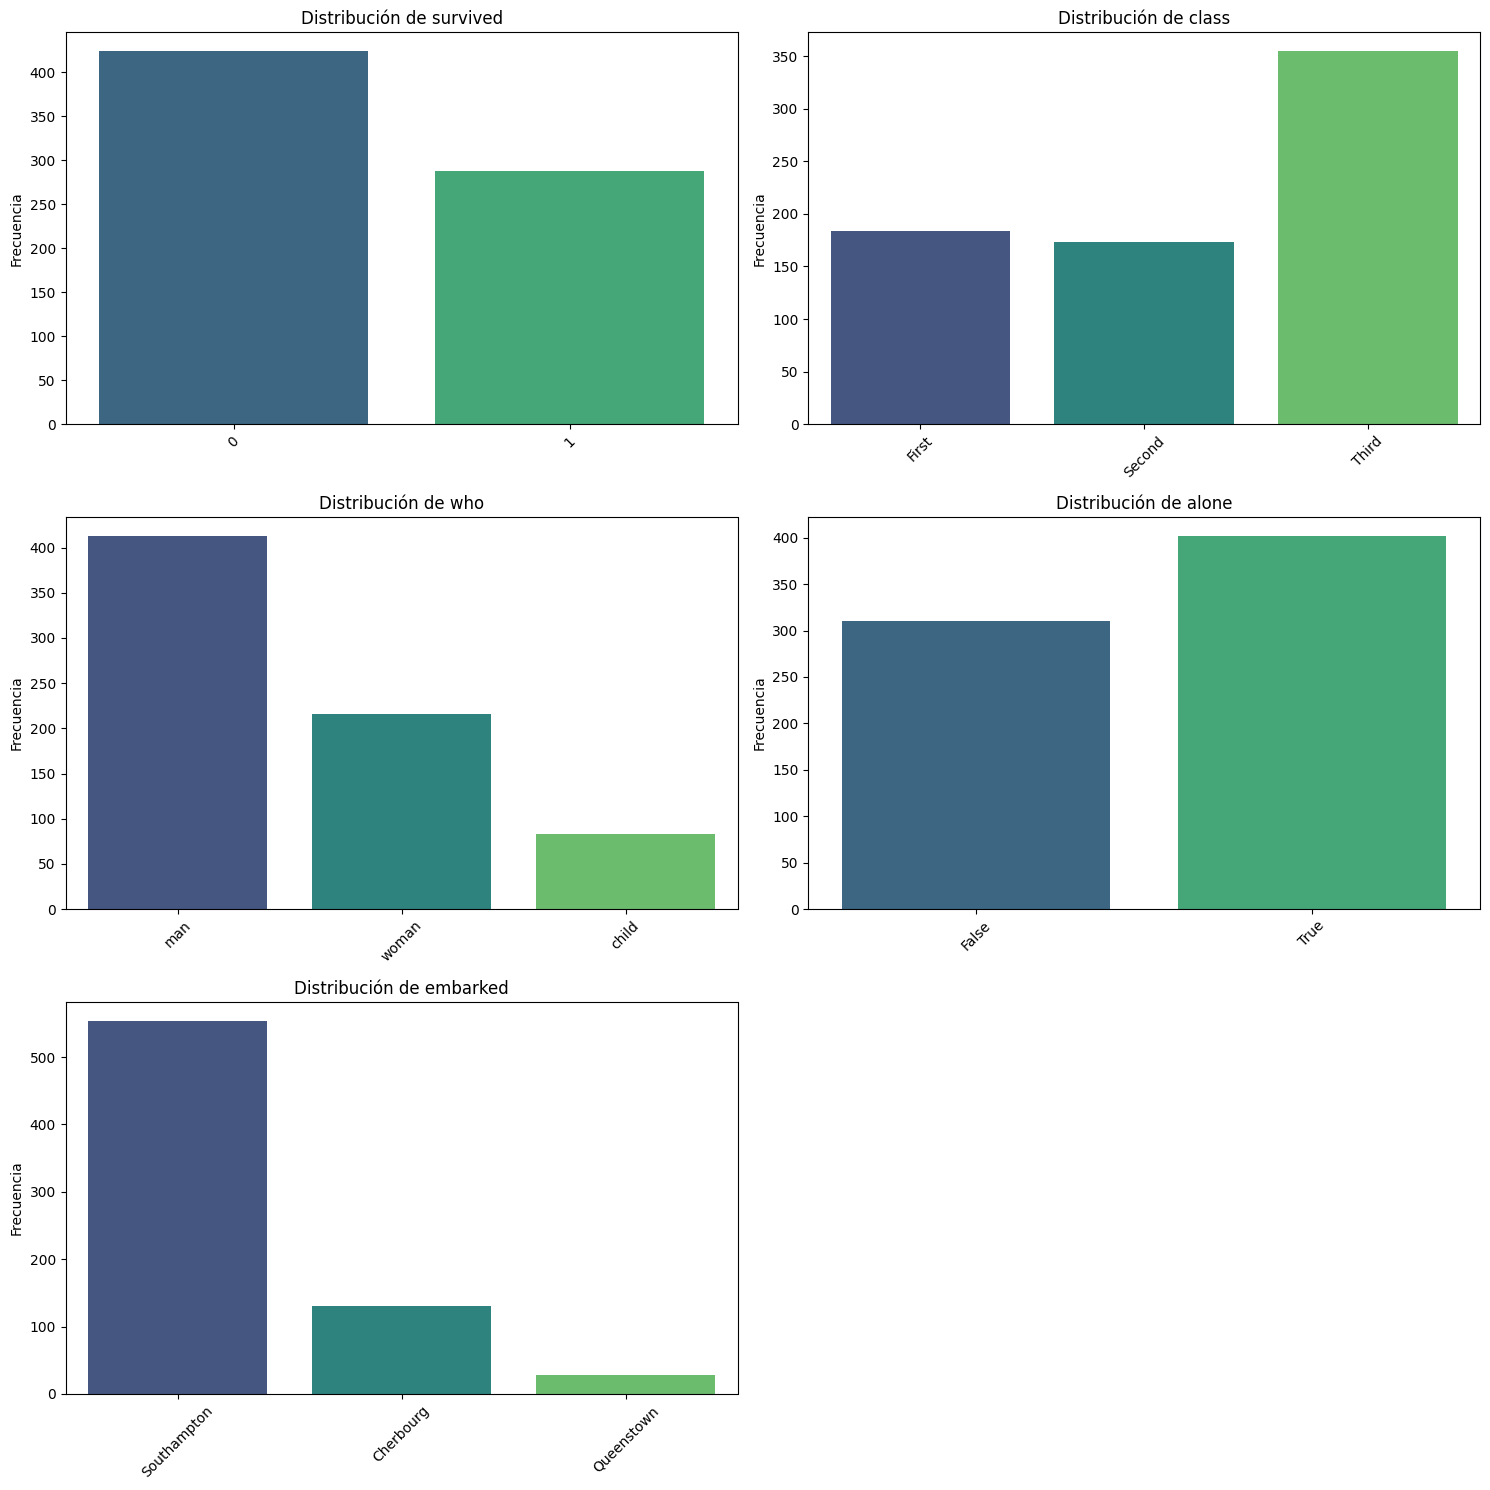

In [117]:
# Y los con gráficos de barras
pinta_distribucion_categoricas(df_titanic,var_categ_titanic)

In [118]:
# Así como, y sobre todo, las frecuencias relativas:
for catego in var_categ_titanic:
   print(f"Para {catego}")
   print(df_titanic[catego].value_counts()/len(df_titanic)*100)
   print("\n")

Para survived
survived
0    59.550562
1    40.449438
Name: count, dtype: float64


Para class
class
Third     49.859551
First     25.842697
Second    24.297753
Name: count, dtype: float64


Para who
who
man      58.005618
woman    30.337079
child    11.657303
Name: count, dtype: float64


Para alone
alone
True     56.460674
False    43.539326
Name: count, dtype: float64


Para embarked
embarked
Southampton    77.808989
Cherbourg      18.258427
Queenstown      3.932584
Name: count, dtype: float64




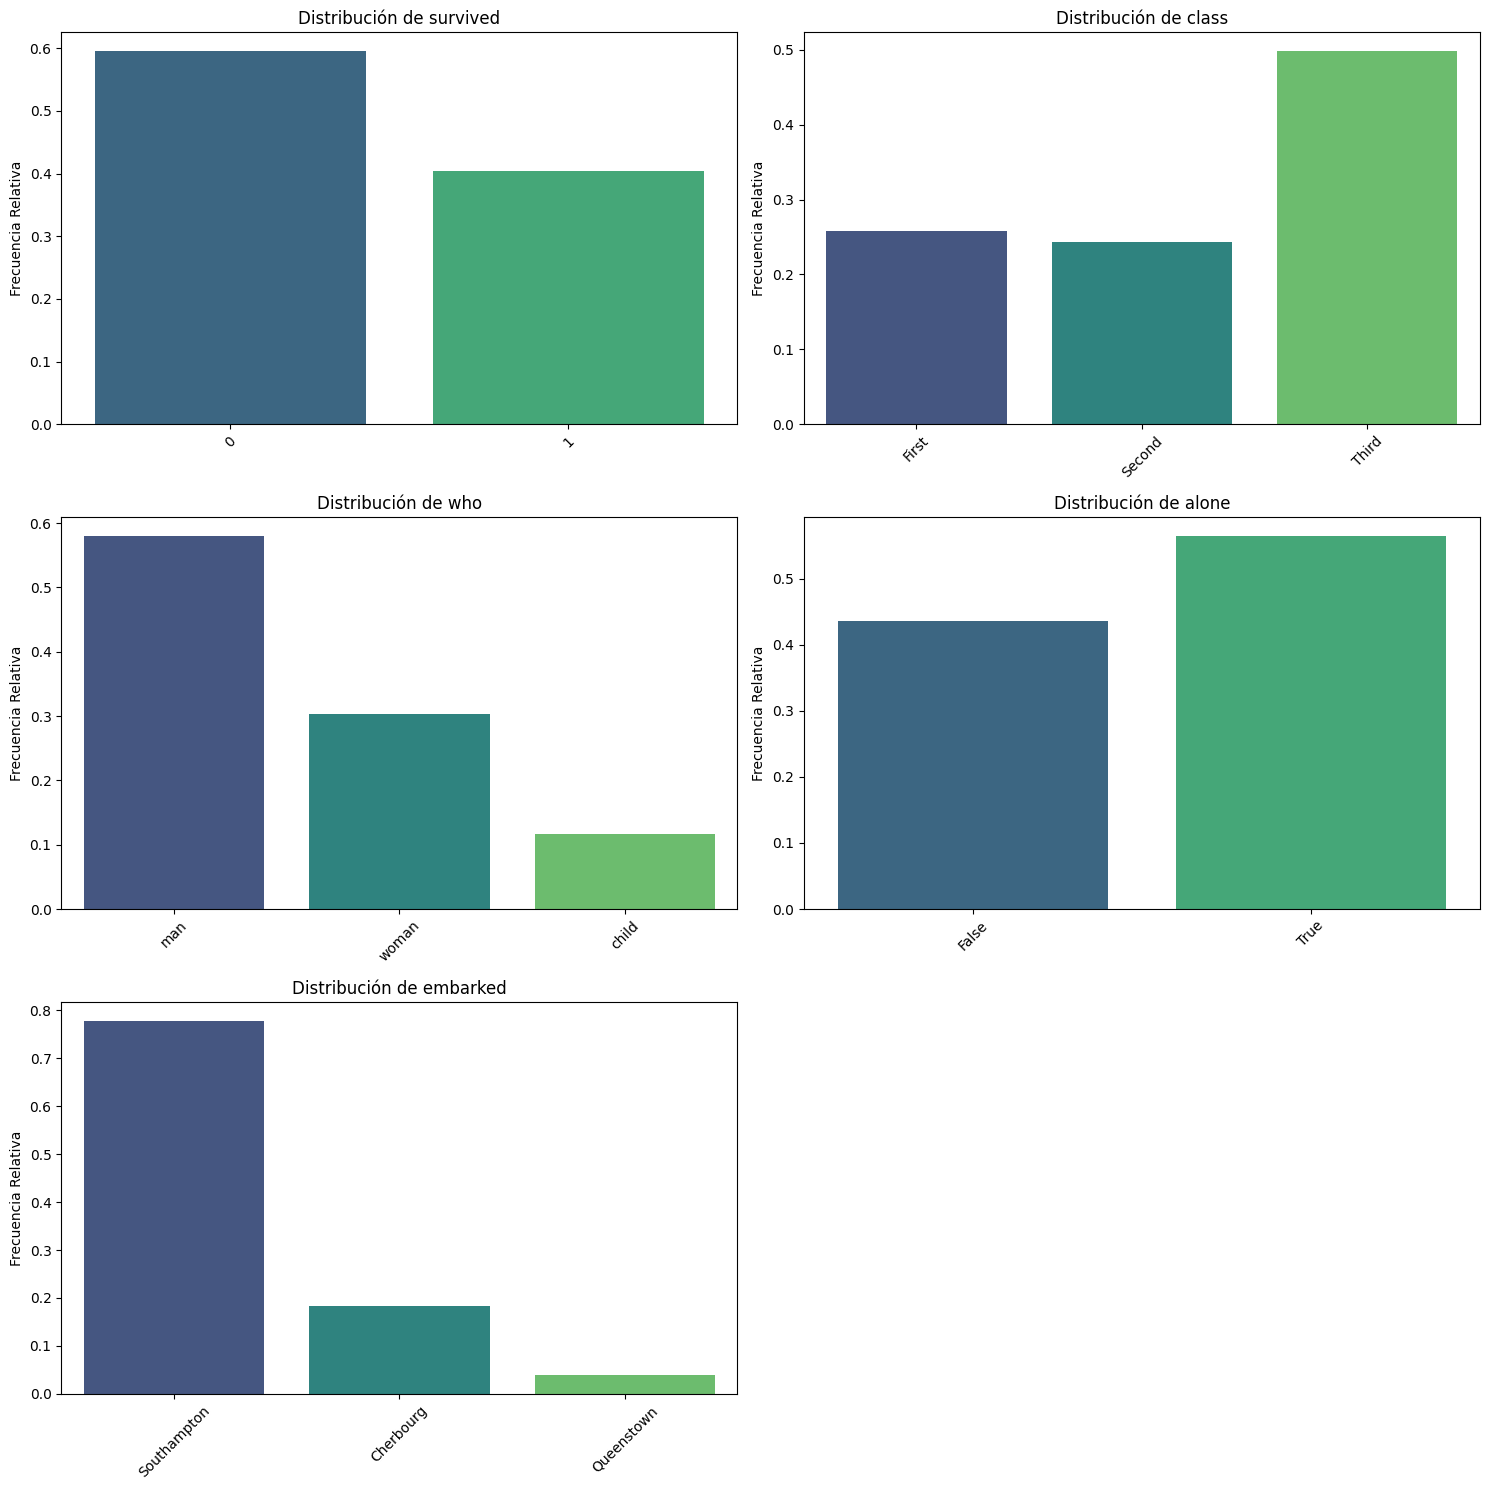

In [119]:
# Y sus respectovos gráficos:
pinta_distribucion_categoricas(df_titanic,var_categ_titanic, relativa= True)

### #2.2 Numéricas

In [120]:
# Primero hago un describe y busco la tendencia central de las númericas a través de sus medias y medianas
df_titanic["age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [121]:
df_titanic["fare"].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: fare, dtype: float64

In [122]:
# Luego, pido la mediana
df_titanic["age"].median()

28.0

In [123]:
df_titanic["fare"].median()

15.64585

In [124]:
# Ahora, las medidas de posición
# primero la función
def get_IQR(df,col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [125]:
get_IQR(df_titanic,"age")

18.0

In [126]:
get_IQR(df_titanic,"fare")

24.95

In [127]:
# Y las cajas
var_num_titanic = ["age","fare"]

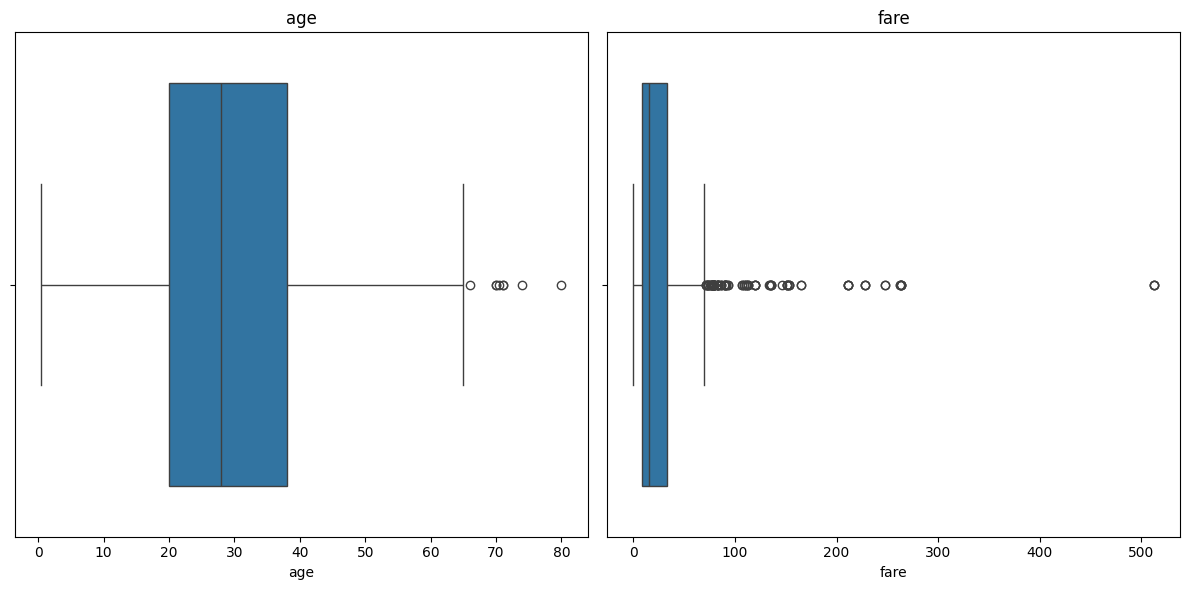

In [128]:
plot_multiple_boxplots(df_titanic, var_num_titanic)

# Medidas de dispersión

In [129]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [130]:
variabilidad(df_titanic)

,std,mean,CV
survived,0.491139,0.404494,1.214205
age,14.492933,29.642093,0.488931
sibsp,0.930692,0.514045,1.810527
fare,52.938648,34.567251,1.531468


<Axes: >

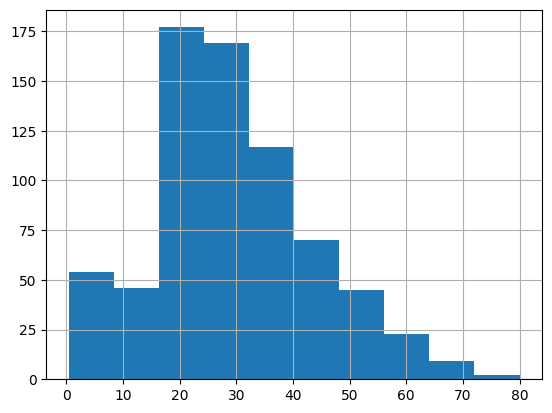

In [131]:
# Ahora, las distribuciones con través de histogramas
df_titanic["age"].hist()
# Al haber eliminado las edades NaN, el gráfico es más equilibrado

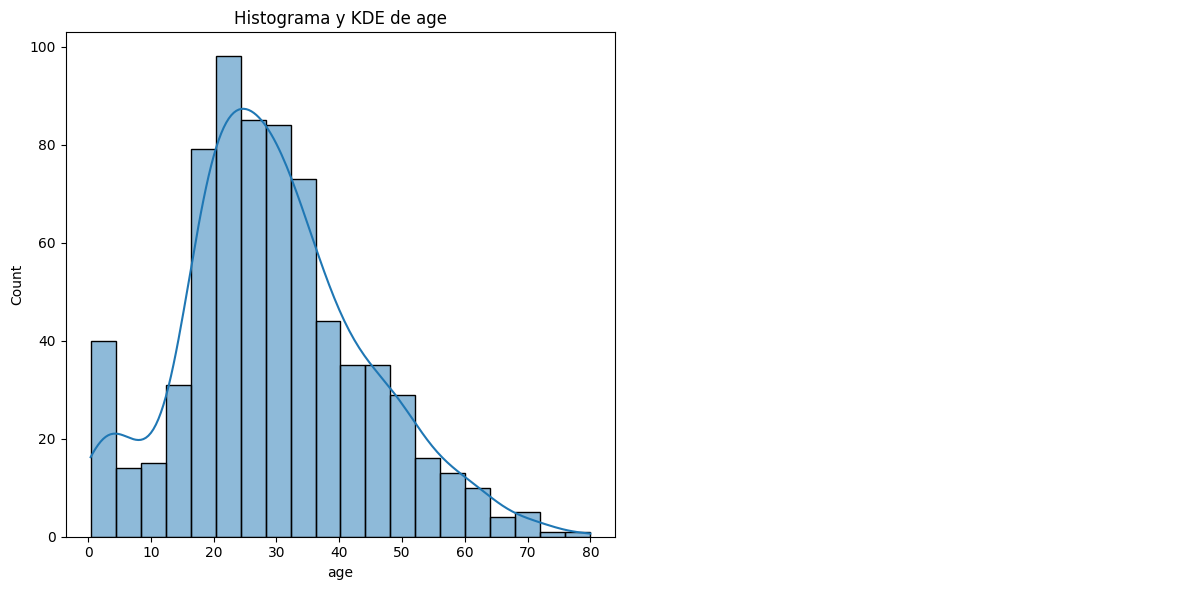

In [132]:
# También la densidad de probabilidad:
plot_histo_den(df_titanic,["age"])

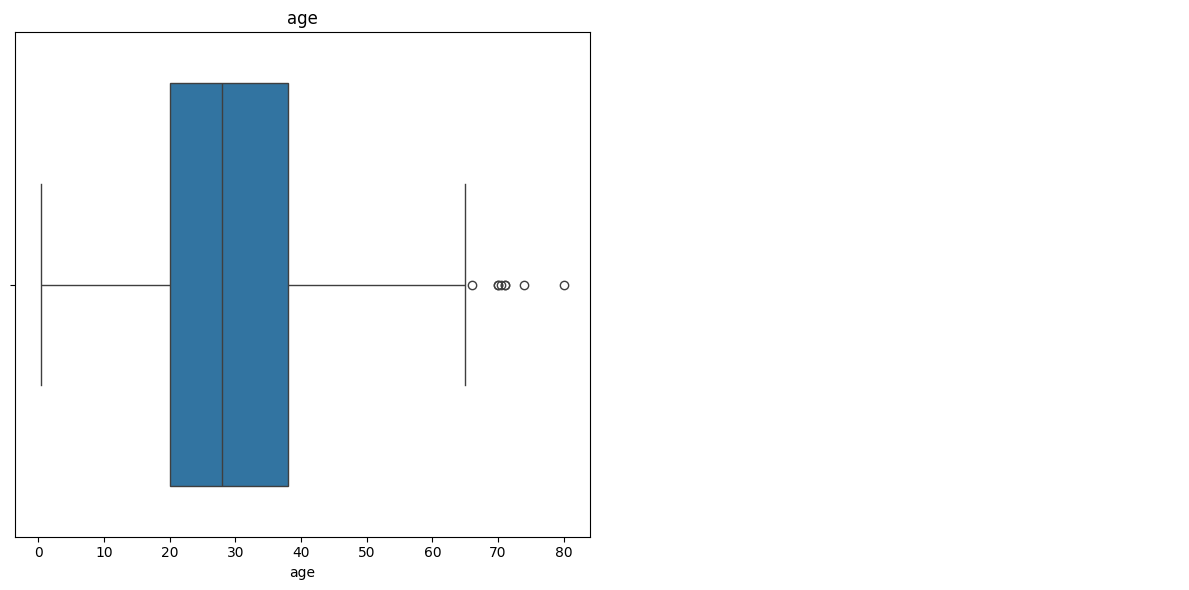

In [133]:
plot_multiple_boxplots(df_titanic,["age"])

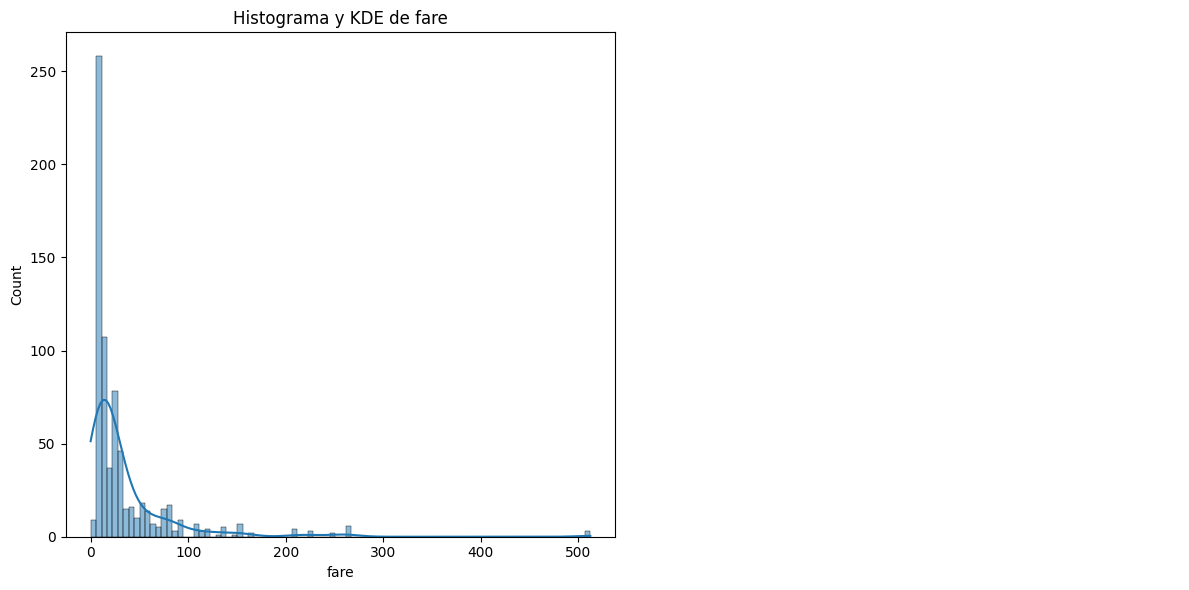

In [134]:
plot_histo_den(df_titanic,["fare"])

<Axes: >

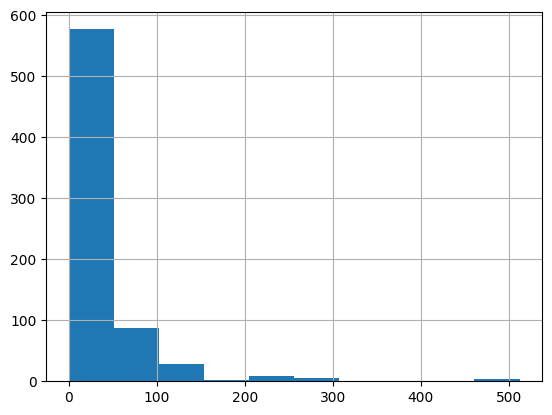

In [135]:
df_titanic["fare"].hist()

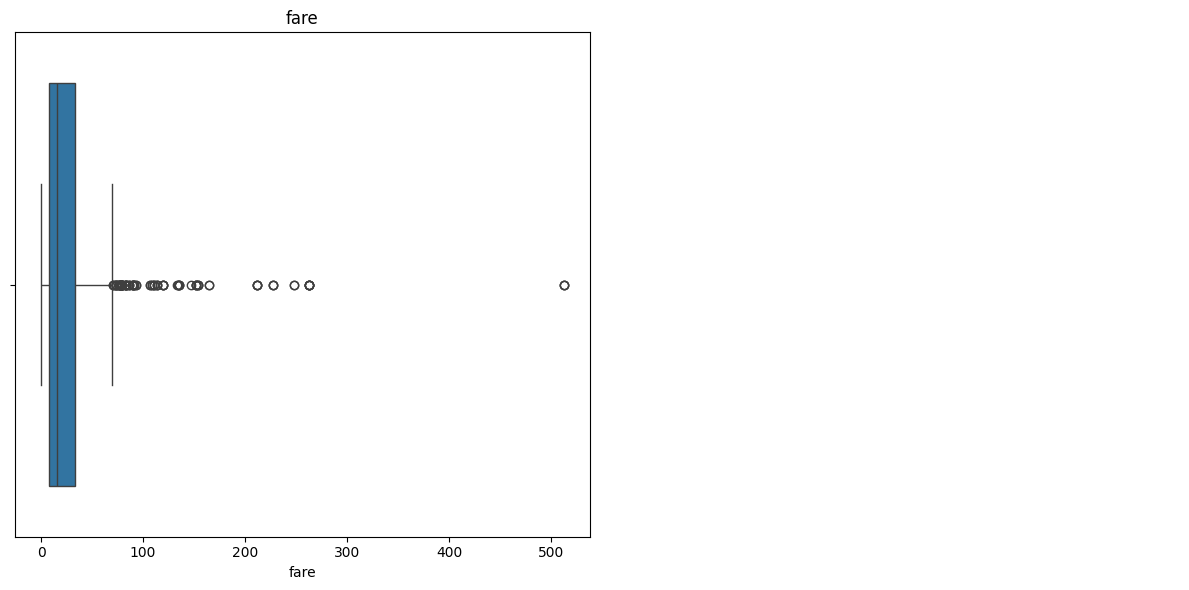

In [136]:
plot_multiple_boxplots(df_titanic,["fare"])

(2,)


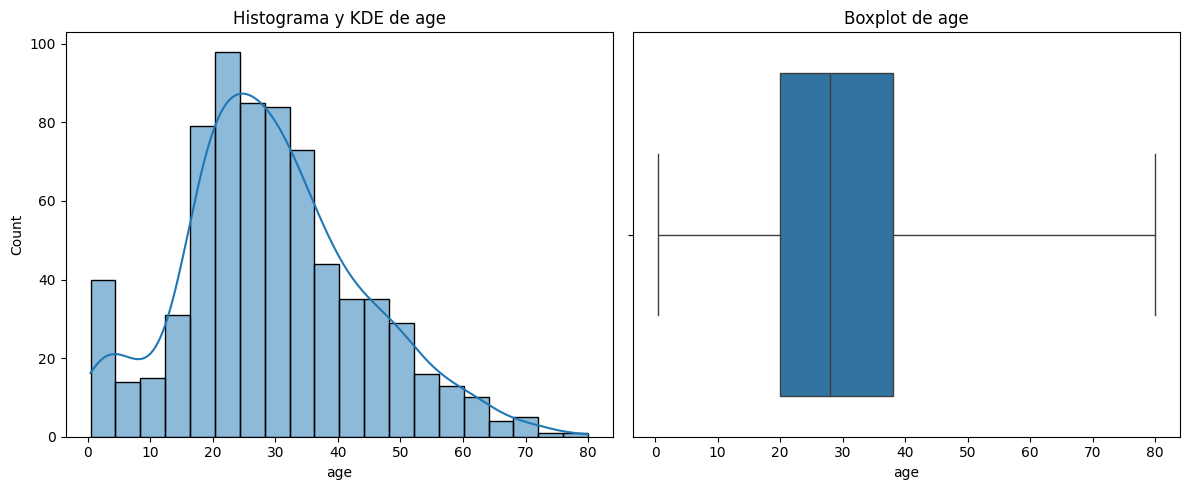

In [137]:
# A pesar de haberlo puesto más arriba, y puesto que se ve mejor, uso esta otra función:
plot_combined_graphs(df_titanic,["age"], whisker_width=4.5)

Conclusiones/observaciones

La mayorparte de las personas sobrevivientes eran mujeres de primeraclase que viajaban acompañadas y habían subido en Southampton
De tercera sobrevivieron unos cuantos, pero sobre el total no son tantos como los de primera.
Embarcaron muchos más hombres que mujeres, entre los hombres hubo mucho más muertos que entre las mujeres
he optado por eliminar las filas con edad NaN porque al intentar normalizarlas, sea con la media general o con la media por hombre/ mujer / niño, segeneraba un pico dudoso sobre los 30 años
Me sorprendió ver que algo más del 40% sobrevivió, me esperaba que fuesen muchos menos
Al comparar las cajas me parece que hay alguna anomalía en las tarifas, un punto muy alejado del resto. Pero otros de los outliers de precio no sé si se debe a que son las tarifas justamente de primera (entre 200 y 300) y segunda clase (entre 100 y 200), o al menos de primera... Me queda pendiente resolver esto de las fares en otra ocasión...
